In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser
import datetime as dt
import seaborn as sns

In [2]:
sosmed_data = pd.read_csv ('sample_social_media_data.csv')
pd.set_option ('display.max_columns', None)
sosmed_data.head()

,id,platform,username,post_date,content,likes,comments,shares
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9


In [3]:
sosmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3000 non-null   int64 
 1   platform   3000 non-null   object
 2   username   3000 non-null   object
 3   post_date  3000 non-null   object
 4   content    3000 non-null   object
 5   likes      3000 non-null   int64 
 6   comments   3000 non-null   int64 
 7   shares     3000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 187.6+ KB


In [4]:
sosmed_data['post_date'] = pd.to_datetime(sosmed_data['post_date'])
sosmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3000 non-null   int64         
 1   platform   3000 non-null   object        
 2   username   3000 non-null   object        
 3   post_date  3000 non-null   datetime64[ns]
 4   content    3000 non-null   object        
 5   likes      3000 non-null   int64         
 6   comments   3000 non-null   int64         
 7   shares     3000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 187.6+ KB


In [5]:
sosmed_data['post_time'] = sosmed_data['post_date'].dt.time

sosmed_data.head()

,id,platform,username,post_date,content,likes,comments,shares,post_time
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03


In [6]:
sosmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         3000 non-null   int64         
 1   platform   3000 non-null   object        
 2   username   3000 non-null   object        
 3   post_date  3000 non-null   datetime64[ns]
 4   content    3000 non-null   object        
 5   likes      3000 non-null   int64         
 6   comments   3000 non-null   int64         
 7   shares     3000 non-null   int64         
 8   post_time  3000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 211.1+ KB


In [7]:
tren_post= sosmed_data.groupby ('post_time')[['likes','comments','shares']].sum().reset_index()
tren_post.head()

,post_time,likes,comments,shares
0,00:45:03,18772,3162,1999
1,01:45:03,20041,3309,2029
2,02:45:03,20340,3367,2142
3,03:45:03,17252,2858,1662
4,04:45:03,19912,3209,1881


In [8]:


# Floor the 'post_date' to the nearest 4-hour interval starting from 01.00
sosmed_data['group_hour'] = sosmed_data['post_date'].dt.hour // 4 * 4

# Convert group_hour into corresponding time intervals
sosmed_data['group_hour'] = sosmed_data['group_hour'].apply(lambda x: f'{str(x).zfill(2)}:00-{str(x+3).zfill(2)}:00')

# Displaying the first few rows of the updated DataFrame
sosmed_data.head()


,id,platform,username,post_date,content,likes,comments,shares,post_time,group_hour
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03,04:00-07:00
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03,04:00-07:00
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03,00:00-03:00
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03,16:00-19:00
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03,00:00-03:00


In [9]:
tren_post1 = sosmed_data.groupby ('group_hour')[['likes','comments','shares']].sum().reset_index()
tren_post1.head()

,group_hour,likes,comments,shares
0,00:00-03:00,76405,12696,7832
1,04:00-07:00,80620,12579,7778
2,08:00-11:00,72483,12287,7235
3,12:00-15:00,84376,13607,8099
4,16:00-19:00,73190,12474,7529


In [10]:
sosmed_data['total_engagement'] = sosmed_data['likes'].add(sosmed_data['shares']).add(sosmed_data['shares'])
sosmed_data.head()

,id,platform,username,post_date,content,likes,comments,shares,post_time,group_hour,total_engagement
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03,04:00-07:00,45
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03,04:00-07:00,235
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03,00:00-03:00,327
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03,16:00-19:00,71
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03,00:00-03:00,30


In [23]:
gruopy_sosmed_hour = sosmed_data.groupby(['platform', 'group_hour'])[['total_engagement']].sum().reset_index()
gruopy_sosmed_hour.head()

,platform,group_hour,total_engagement
0,Facebook,00:00-03:00,30050
1,Facebook,04:00-07:00,31305
2,Facebook,08:00-11:00,28309
3,Facebook,12:00-15:00,36748
4,Facebook,16:00-19:00,29012


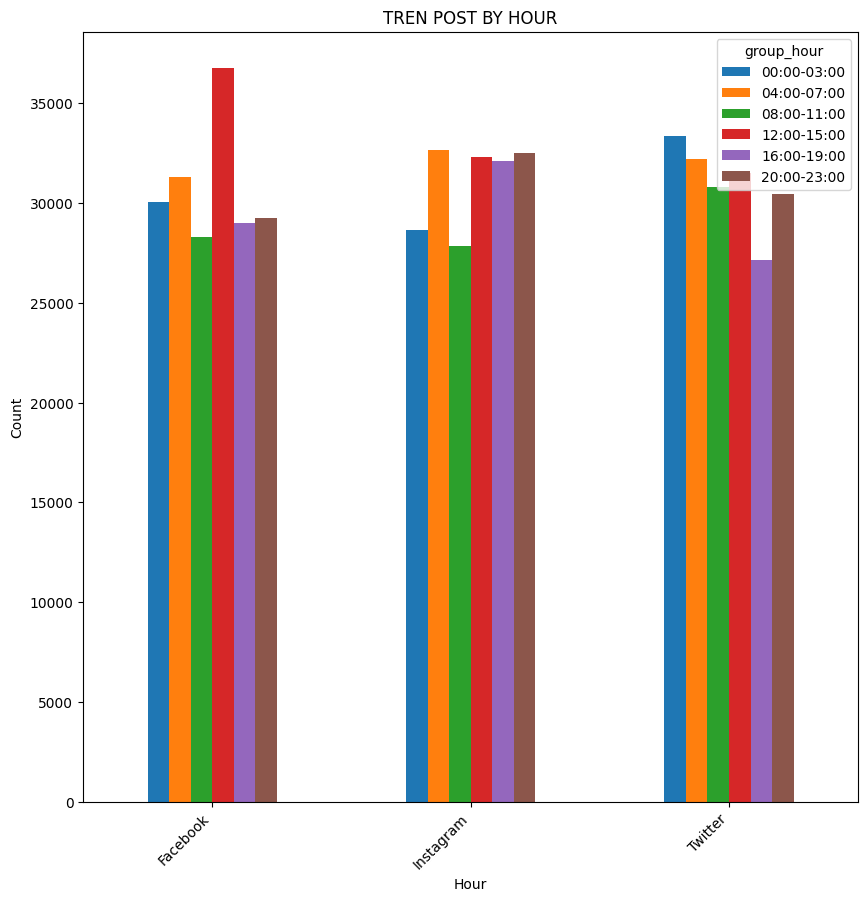

In [24]:
gruopy_sosmed_hour.set_index(['platform', 'group_hour'], inplace=True)

ax = gruopy_sosmed_hour.unstack()['total_engagement'].plot(kind='bar', title='TREN POST BY HOUR', xlabel='Platform', ylabel='Count')

plt.gcf().set_size_inches(10, 10)  # Set size of the plot
plt.savefig('tren_post_by_hour.png', dpi=300)  # Save the plot with higher resolution

plt.xticks(rotation=45, ha='right')
plt.show()


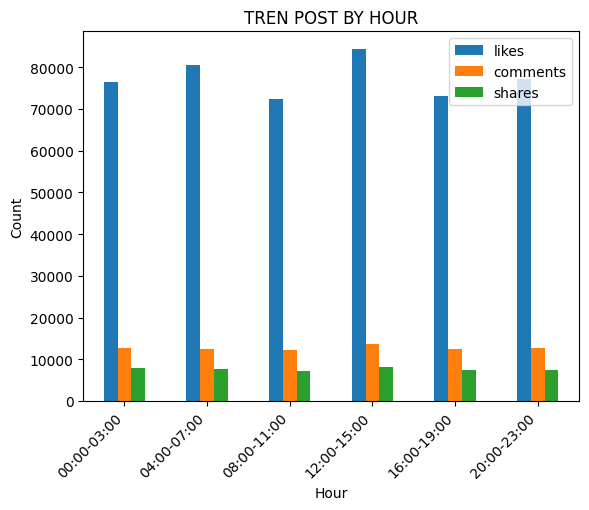

In [13]:
#MENCARI TREN tertentu dalam frekuensi posting atau aktivitas pengguna pada jam-jam tertentu dalam sehari

tren_post1.set_index('group_hour', inplace=True)


tren_post1.plot.bar(title='TREN POST BY HOUR', xlabel='Hour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [14]:
sosmed_tren = sosmed_data.groupby(['platform', 'group_hour'])[['likes', 'comments', 'shares']].sum().reset_index()
sosmed_tren


,platform,group_hour,likes,comments,shares
0,Facebook,00:00-03:00,25060,4064,2495
1,Facebook,04:00-07:00,26291,3911,2507
2,Facebook,08:00-11:00,23969,4083,2170
3,Facebook,12:00-15:00,30768,5304,2990
4,Facebook,16:00-19:00,23880,4086,2566
5,Facebook,20:00-23:00,24278,4330,2479
6,Instagram,00:00-03:00,23486,4372,2593
7,Instagram,04:00-07:00,27466,4438,2603
8,Instagram,08:00-11:00,22861,4109,2487
9,Instagram,12:00-15:00,26935,4517,2692


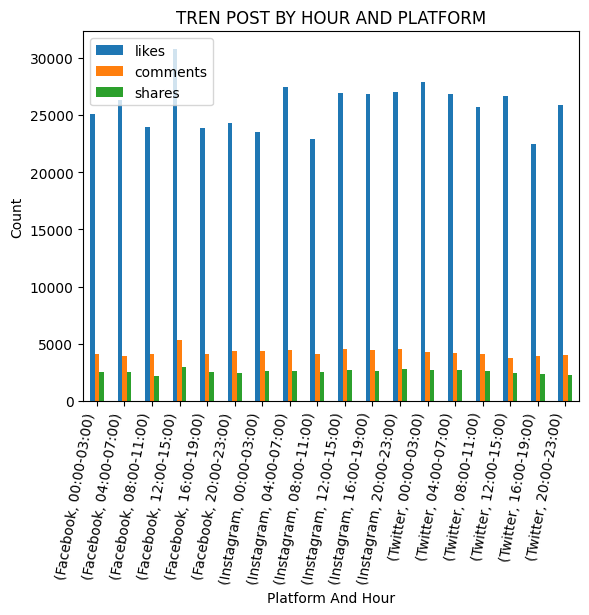

In [15]:
sosmed_tren.set_index(['platform', 'group_hour'], inplace=True)

# Plotting a bar chart
sosmed_tren.plot.bar(title='TREN POST BY HOUR AND PLATFORM', xlabel='Platform And Hour', ylabel='Count')
plt.xticks(rotation=80, ha='right')
plt.show()


In [16]:
content_mean = sosmed_data.groupby ('content')[['likes','comments','shares']].mean().reset_index()
content_mean

,content,likes,comments,shares
0,A finish east face task.,35.0,12.0,14.0
1,A two economy pretty often fill.,138.0,30.0,12.0
2,Ability question approach town wish style yes.,164.0,36.0,14.0
3,Ability west view respond task light.,89.0,12.0,1.0
4,Able seven popular degree show work office.,221.0,32.0,19.0
...,...,...,...,...
2995,Young writer television.,147.0,7.0,11.0
2996,Your air administration movie another.,115.0,38.0,21.0
2997,Your budget upon administration his.,284.0,18.0,29.0
2998,Your hand who degree south now blood.,51.0,23.0,7.0


In [17]:
sosmed_data [['likes','comments','shares']].mean()

likes       154.732333
comments     25.486000
shares       15.338000
dtype: float64

In [18]:
sosmed_data['len_post'] = sosmed_data['content'].apply(len)
sosmed_data.head()


,id,platform,username,post_date,content,likes,comments,shares,post_time,group_hour,total_engagement,len_post
0,1,Twitter,fosterkayla,2023-10-10 07:45:03,Scene six education society.,17,15,14,07:45:03,04:00-07:00,45,28
1,2,Facebook,xnorris,2023-10-25 07:45:03,Practice people than help tend likely.,177,4,29,07:45:03,04:00-07:00,235,38
2,3,Facebook,michelleking,2023-03-25 03:45:03,Daughter yes word risk shoulder evening nation.,279,39,24,03:45:03,00:00-03:00,327,47
3,4,Instagram,penaveronica,2022-12-10 17:45:03,All prove lot bit teacher election speak.,45,18,13,17:45:03,16:00-19:00,71,41
4,5,Instagram,smithmeghan,2022-12-10 01:45:03,Those lawyer each sit sure organization stop.,12,6,9,01:45:03,00:00-03:00,30,45


In [19]:
len_post = sosmed_data.groupby('len_post')[['likes','comments','shares']].sum().reset_index()
len_post

,len_post,likes,comments,shares
0,10,144,48,17
1,12,23,25,16
2,13,512,81,32
3,14,1686,314,109
4,15,1950,324,193
5,16,2247,449,277
6,17,6240,1076,720
7,18,4857,785,528
8,19,7293,1236,796
9,20,6220,1034,770


In [20]:

# Create a new column 'len_group' based on the length of the post
sosmed_data['len_group'] = pd.cut(sosmed_data['len_post'], 
                                  bins=[10, 20, 40, 50, float('inf')], 
                                  labels=['lebih 10 karakter', 'lebih 20 karakter', 'lebih 40 karakter', 'lebih 50 karakter'])

# Group the data by 'len_group' and sum up the 'likes', 'comments', and 'shares'
grouped_data = sosmed_data.groupby('len_group')[['likes', 'comments', 'shares']].sum().reset_index()

print(grouped_data)


           len_group   likes  comments  shares
0  lebih 10 karakter   31028      5324    3441
1  lebih 20 karakter  275670     45601   27544
2  lebih 40 karakter  112286     18356   10754
3  lebih 50 karakter   45069      7129    4258


C:\Users\ibnu\AppData\Local\Temp\ipykernel_17264\51669614.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sosmed_data.groupby('len_group')[['likes', 'comments', 'shares']].sum().reset_index()


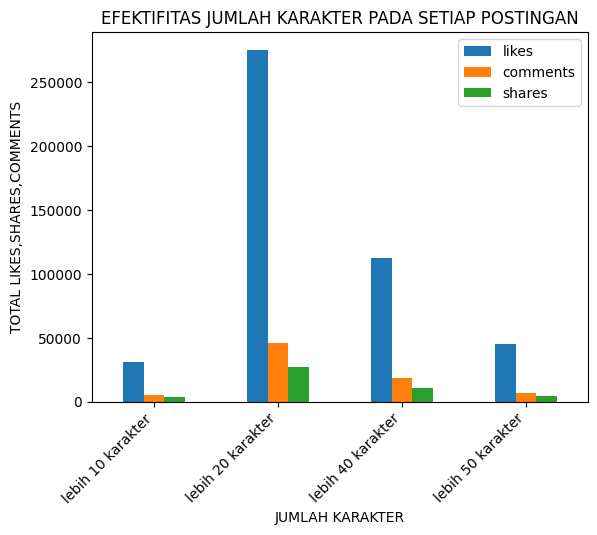

In [21]:
# melihat seberapa efeketif panjang karakter untuk menentukan jumlah like, share, dan comment

grouped_data.set_index('len_group', inplace=True)


grouped_data.plot.bar(title='EFEKTIFITAS JUMLAH KARAKTER PADA SETIAP POSTINGAN', xlabel='JUMLAH KARAKTER', ylabel='TOTAL LIKES,SHARES,COMMENTS')
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
user_interaksi = sosmed_data.groupby('username')[['shares', 'comments']].sum().reset_index()
user_interaksi = user_interaksi.sort_values(by=['shares', 'comments'], ascending=False)
user_interaksi.head(10)


,username,shares,comments
1294,johnsonmichael,62,67
2893,ydavis,58,101
2018,osmith,58,53
1563,leejennifer,52,69
2140,qlewis,48,90
1997,ojohnson,48,61
380,cbrown,47,36
2939,zsmith,46,7
2613,tjones,44,25
1799,michael62,42,84
